In [1]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from statsmodels.stats import diagnostic
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
data_folder = './MovieSummaries/'
#paths to files
plot_summaries_path = data_folder + 'plot_summaries.txt'
movie_metadata_path = data_folder + 'movie.metadata.tsv'
character_metadata_path = data_folder + 'character.metadata.tsv'

# load the data
# 1. Plot summaries data
plot_summaries_df = pd.read_csv(plot_summaries_path, delimiter='\t', names=['wikipedia_movie_id', 'plot_summary'], 
                                 encoding='utf-8')

# 2. Movie metadata
movie_metadata_df = pd.read_csv(movie_metadata_path, delimiter='\t', names=['wikipedia_movie_id', 'freebase_movie_id', 
                                                                            'movie_name', 'release_date', 'box_office_revenue',
                                                                            'runtime', 'languages', 'countries', 'genres'], 
                                 encoding='utf-8')

# 3. Character metadata
character_metadata_df = pd.read_csv(character_metadata_path, delimiter='\t', names=['wikipedia_movie_id', 'freebase_movie_id', 'release_date', 'character_name', 
                                                                                    'actor_dob', 'actor_gender', 'actor_height', 'actor_ethnicity', 'actor_name', 
                                                                                    'actor_age_at_release', 'freebase_character_actor_map_id', 'freebase_character_id', 
                                                                                    'freebase_actor_id'], 
                                     encoding='utf-8')


In [3]:
print("Size of plot_summaries_df :", plot_summaries_df.shape)
print("Size of movie_metadata_df :", movie_metadata_df.shape)
print("Size of character_metadata_df :", character_metadata_df.shape)


Size of plot_summaries_df : (42303, 2)
Size of movie_metadata_df : (81741, 9)
Size of character_metadata_df : (450669, 13)


In [4]:

# first few rows of each dataframe to understand
print("Plot Summaries DataFrame:")
print(plot_summaries_df.head(), "\n")

print("Movie Metadata DataFrame:")
print(movie_metadata_df.head(), "\n")

print("Character Metadata DataFrame:")
print(character_metadata_df.head(), "\n")



Plot Summaries DataFrame:
   wikipedia_movie_id                                       plot_summary
0            23890098  Shlykov, a hard-working taxi driver and Lyosha...
1            31186339  The nation of Panem consists of a wealthy Capi...
2            20663735  Poovalli Induchoodan  is sentenced for six yea...
3             2231378  The Lemon Drop Kid , a New York City swindler,...
4              595909  Seventh-day Adventist Church pastor Michael Ch... 

Movie Metadata DataFrame:
   wikipedia_movie_id freebase_movie_id  \
0              975900         /m/03vyhn   
1             3196793         /m/08yl5d   
2            28463795        /m/0crgdbh   
3             9363483        /m/0285_cd   
4              261236         /m/01mrr1   

                                          movie_name release_date  \
0                                     Ghosts of Mars   2001-08-24   
1  Getting Away with Murder: The JonBenét Ramsey ...   2000-02-16   
2                                        B

In [5]:
headers = movie_metadata_df.columns.tolist()

print("Headers of the movie_metadata_df:")
print(headers)
headers = plot_summaries_df.columns.tolist()

print("Headers of the plot_summaries_df:")
print(headers)
headers = character_metadata_df.columns.tolist()

print("Headers of the character_metadata_df:")
print(headers)

Headers of the movie_metadata_df:
['wikipedia_movie_id', 'freebase_movie_id', 'movie_name', 'release_date', 'box_office_revenue', 'runtime', 'languages', 'countries', 'genres']
Headers of the plot_summaries_df:
['wikipedia_movie_id', 'plot_summary']
Headers of the character_metadata_df:
['wikipedia_movie_id', 'freebase_movie_id', 'release_date', 'character_name', 'actor_dob', 'actor_gender', 'actor_height', 'actor_ethnicity', 'actor_name', 'actor_age_at_release', 'freebase_character_actor_map_id', 'freebase_character_id', 'freebase_actor_id']


In [6]:

# missing values
print("Missing values in Plot Summaries DataFrame:")
print(plot_summaries_df.isnull().sum(), "\n")

print("Missing values in Movie Metadata DataFrame:")
print(movie_metadata_df.isnull().sum(), "\n")

print("Missing values in Character Metadata DataFrame:")
print(character_metadata_df.isnull().sum(), "\n")
#

Missing values in Plot Summaries DataFrame:
wikipedia_movie_id    0
plot_summary          0
dtype: int64 

Missing values in Movie Metadata DataFrame:
wikipedia_movie_id        0
freebase_movie_id         0
movie_name                0
release_date           6902
box_office_revenue    73340
runtime               20450
languages                 0
countries                 0
genres                    0
dtype: int64 

Missing values in Character Metadata DataFrame:
wikipedia_movie_id                      0
freebase_movie_id                       0
release_date                         9995
character_name                     257875
actor_dob                          106145
actor_gender                        45609
actor_height                       295845
actor_ethnicity                    344611
actor_name                           1228
actor_age_at_release               158113
freebase_character_actor_map_id         0
freebase_character_id              257865
freebase_actor_id             

In [7]:
for df in [character_metadata_df, movie_metadata_df, plot_summaries_df]:
    df['wikipedia_movie_id'] = pd.to_numeric(df['wikipedia_movie_id'], errors='coerce').fillna(-1).astype(int)

# Change data types
plot_summaries_df['plot_summary'] = plot_summaries_df['plot_summary'].astype('string')  
movie_metadata_df['movie_name'] = movie_metadata_df['movie_name'].astype('string')  
character_metadata_df['actor_name'] = character_metadata_df['actor_name'].astype('string')  
character_metadata_df['character_name'] = character_metadata_df['character_name'].astype('string')  
character_metadata_df['actor_gender'] = character_metadata_df['actor_gender'].astype('string')  
movie_metadata_df['freebase_movie_id'] = movie_metadata_df['freebase_movie_id'].astype('string')  
character_metadata_df['freebase_character_actor_map_id'] = character_metadata_df['freebase_character_actor_map_id'].astype('string')  
character_metadata_df['freebase_character_id'] = character_metadata_df['freebase_character_id'].astype('string')  
character_metadata_df['freebase_actor_id'] = character_metadata_df['freebase_actor_id'].astype('string')  

# Convert to float
character_metadata_df['actor_age_at_release'] = pd.to_numeric(character_metadata_df['actor_age_at_release'], errors='coerce')

import json
# Convert to json
movie_metadata_df['countries'] = movie_metadata_df['countries'].apply(json.loads)
movie_metadata_df['languages'] = movie_metadata_df['languages'].apply(json.loads)  
movie_metadata_df['genres'] = movie_metadata_df['genres'].apply(json.loads) 


print("Data types in character_metadata_df:")
print(character_metadata_df.dtypes)
print("\n Data types in movie_metadata_df:")
print(movie_metadata_df.dtypes)
print("\n Data types in plot_summaries_df:")
print(plot_summaries_df.dtypes)


Data types in character_metadata_df:
wikipedia_movie_id                          int32
freebase_movie_id                          object
release_date                               object
character_name                     string[python]
actor_dob                                  object
actor_gender                       string[python]
actor_height                              float64
actor_ethnicity                            object
actor_name                         string[python]
actor_age_at_release                      float64
freebase_character_actor_map_id    string[python]
freebase_character_id              string[python]
freebase_actor_id                  string[python]
dtype: object

 Data types in movie_metadata_df:
wikipedia_movie_id             int32
freebase_movie_id     string[python]
movie_name            string[python]
release_date                  object
box_office_revenue           float64
runtime                      float64
languages                     object
count

In [8]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')


def extract_values(value):
    if isinstance(value, dict):
        return list(value.values())
    elif isinstance(value, str):
        return [value]
    return []
# extraction of values for genres
movie_metadata_df['genres'] = movie_metadata_df['genres'].apply(extract_values)

unique_genres = set(genre for genres in movie_metadata_df['genres'] for genre in genres)

for genre in unique_genres:
    movie_metadata_df[genre] = movie_metadata_df['genres'].apply(lambda x: 1 if genre in x else 0)

print(unique_genres)

{'Early Black Cinema', 'Instrumental Music', 'Tokusatsu', 'New Hollywood', 'Splatter film', 'Remake', 'Buddy Picture', 'Crime Thriller', 'Media Satire', 'Drama', 'Fairy tale', 'Social problem film', 'Action Comedy', 'Chick flick', 'Sports', 'Adult', 'Cold War', 'Legal drama', 'Stoner film', 'Jukebox musical', 'Mystery', 'Adventure Comedy', 'Coming-of-age film', 'Travel', 'Anime', 'Spaghetti Western', 'Erotic Drama', 'Road movie', 'Monster movie', 'Marriage Drama', 'Crime', 'Sci-Fi Horror', 'Bengali Cinema', 'Musical', 'Dogme 95', 'Tollywood', 'Blaxploitation', 'Biopic [feature]', 'Courtroom Drama', 'Auto racing', 'Addiction Drama', 'Medical fiction', 'Screwball comedy', 'Humour', 'Sword and sorcery films', 'Chinese Movies', 'Zombie Film', 'Tragedy', 'Avant-garde', 'C-Movie', 'Revisionist Western', 'Caper story', 'Culture & Society', 'Romance Film', 'Domestic Comedy', 'Family Film', 'Alien invasion', 'Family Drama', 'News', 'Ensemble Film', 'Superhero', 'Horror Comedy', "Children's/Fami

In [9]:

# extraction of values for language
movie_metadata_df['languages'] = movie_metadata_df['languages'].apply(extract_values)

unique_languages = set(language for languages in movie_metadata_df['languages'] for language in languages)

for language in unique_languages:
    movie_metadata_df[language] = movie_metadata_df['languages'].apply(lambda x: 1 if language in x else 0)

print(unique_languages)

{'Mende Language', 'Yolngu Matha', 'Gaelic', 'Chinese, Jinyu Language', 'Papiamento language', 'Algonquin Language', 'Guanzhong Hua', 'Hindi Language', 'Maya, Yucatán Language', 'Cheyenne Language', 'Teochew', '𐐖𐐲𐑉𐑋𐑌𐐲', 'Aramaic language', 'Italian', 'Min Nan', 'Kuna language', 'Picard Language', 'Portuguese Language', 'Khmer language', 'Hausa Language', 'Saami, North Language', 'Banyumasan language', 'Chadian Arabic', 'Persian Language', 'Scottish Gaelic language', 'Catalan language', 'Luxembourgish language', 'Awadhi Language', 'Frisian, Western Language', 'Welsh Language', 'Hungary', 'Burmese Language', 'Sunda Language', 'Korean Sign Language', 'Bengali Language', 'Hindustani language', 'Mandarin Chinese', 'Hopi Language', 'Norwegian Language', 'Cantonese', 'Marathi Language', 'Maninka language', 'Esperanto Language', 'Dzongkha Language', 'Bosnian language', 'Rajasthani language', 'Hmong language', 'Latin Language', 'Sinhala Language', 'Chinese, Hakka Language', 'Swahili Language', 

In [10]:
# extraction of values for countries
movie_metadata_df['countries'] = movie_metadata_df['countries'].apply(extract_values)

unique_countries = set(country for countries in movie_metadata_df['countries'] for country in countries)

for country in unique_countries:
    movie_metadata_df[country] = movie_metadata_df['countries'].apply(lambda x: 1 if country in x else 0)

print(unique_countries)

{'Iraqi Kurdistan', 'Isle of Man', 'Palestinian territories', 'Cameroon', 'South Korea', 'Indonesia', 'Turkmenistan', 'Federal Republic of Yugoslavia', 'Bahrain', 'Democratic Republic of the Congo', 'Slovakia', 'Mexico', 'Zimbabwe', 'Mandatory Palestine', 'Tunisia', 'Ethiopia', 'Lithuania', 'Egypt', 'Hong Kong', 'Cuba', 'Costa Rica', 'Israel', 'Wales', 'Austria', 'United States of America', 'Senegal', 'Nigeria', 'Aruba', 'Kuwait', 'Albania', 'Hungary', 'Bhutan', 'Republic of China', 'Korea', 'Ukranian SSR', 'Puerto Rico', 'Soviet occupation zone', 'Armenia', 'Taiwan', 'Czechoslovakia', 'Switzerland', 'Cambodia', 'Denmark', 'Spain', 'Macau', 'Libya', 'Japan', 'India', 'Afghanistan', 'South Africa', 'Turkey', 'Morocco', 'Philippines', 'Guinea-Bissau', 'Australia', 'Finland', 'Congo', 'Venezuela', 'Malta', 'Burkina Faso', 'Crime', 'Croatia', 'Poland', 'Bolivia', 'Slovenia', 'Mali', 'Jamaica', 'Singapore', 'Georgian SSR', 'Uruguay', 'Georgia', 'Jordan', 'Weimar Republic', 'United Arab Emir

In [11]:
# Remove duplicates
plot_summaries_df.drop_duplicates(subset='wikipedia_movie_id', inplace=True)
movie_metadata_df.drop_duplicates(subset='wikipedia_movie_id', inplace=True)

# Convert numerical columns to numeric types (coerce errors to handle non-numeric entries)
movie_metadata_df['box_office_revenue'] = pd.to_numeric(movie_metadata_df['box_office_revenue'], errors='coerce')
movie_metadata_df['runtime'] = pd.to_numeric(movie_metadata_df['runtime'], errors='coerce')
character_metadata_df['actor_height'] = pd.to_numeric(character_metadata_df['actor_height'], errors='coerce')
character_metadata_df['actor_age_at_release'] = pd.to_numeric(character_metadata_df['actor_age_at_release'], errors='coerce')


In [12]:
# to understand the distributions
print("Summary statistics for Movie Metadata:")
print(movie_metadata_df[['box_office_revenue', 'runtime']].describe(), "\n")

print("Summary statistics for Character Metadata:")
print(character_metadata_df[['actor_height', 'actor_age_at_release']].describe(), "\n")


Summary statistics for Movie Metadata:
       box_office_revenue       runtime
count        8.401000e+03  6.129100e+04
mean         4.799363e+07  1.118192e+02
std          1.121753e+08  4.360070e+03
min          1.000000e+04  0.000000e+00
25%          2.083193e+06  8.100000e+01
50%          1.063969e+07  9.300000e+01
75%          4.071696e+07  1.060000e+02
max          2.782275e+09  1.079281e+06 

Summary statistics for Character Metadata:
        actor_height  actor_age_at_release
count  154824.000000         292556.000000
mean        1.788893             37.788523
std         4.379940             20.587870
min         0.610000          -7896.000000
25%         1.676400             28.000000
50%         1.750000             36.000000
75%         1.830000             47.000000
max       510.000000            103.000000 



In [13]:
over_possible_duration = (movie_metadata_df['runtime']> 420).sum()
print( over_possible_duration, "movies are over 7 hours runtime ")

movie_metadata_df['runtime'] = movie_metadata_df['runtime'].where(movie_metadata_df['runtime']<420, np.nan)
character_metadata_df['actor_age_at_release'] = character_metadata_df['actor_age_at_release'].where(character_metadata_df['actor_age_at_release']>0, np.nan)

big_revenue= (movie_metadata_df['box_office_revenue']>1e9).sum()
print( big_revenue , "movies made more than a billion revenue")

56 movies are over 7 hours runtime 
12 movies made more than a billion revenue


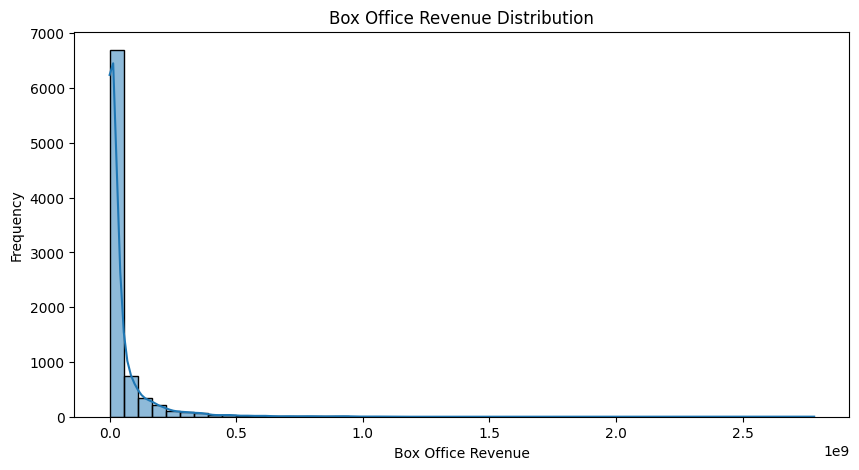

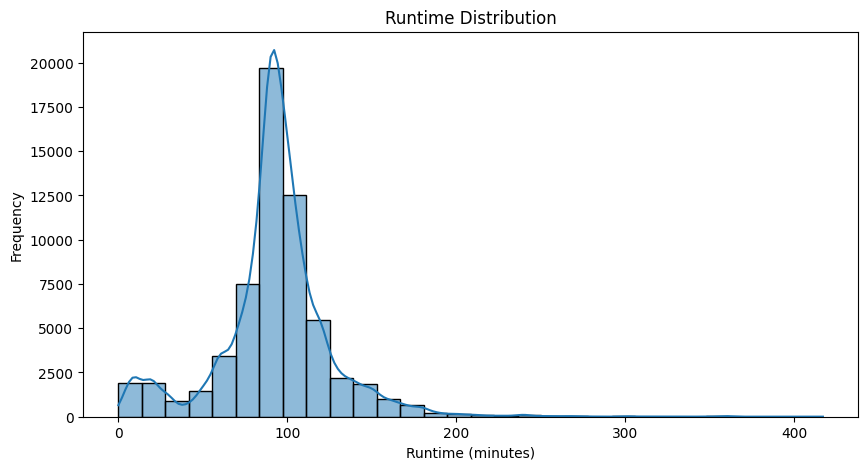

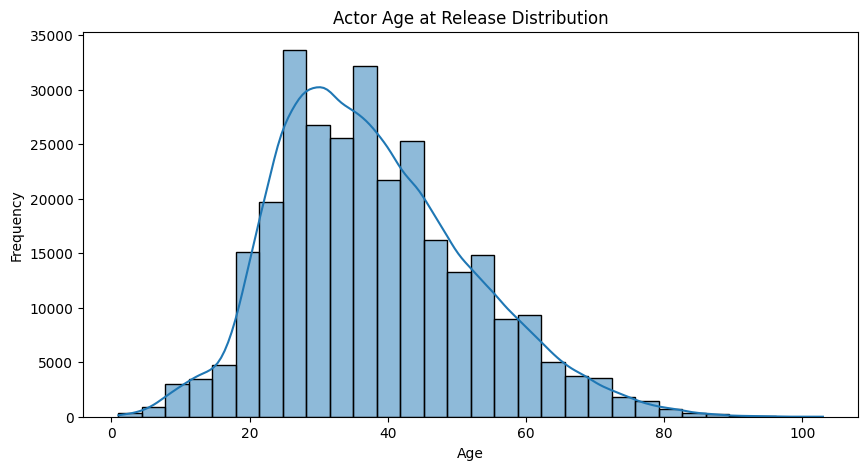

In [14]:

#histograms 
plt.figure(figsize=(10, 5))
sns.histplot(movie_metadata_df['box_office_revenue'].dropna(), bins=50, kde=True)
plt.title('Box Office Revenue Distribution')
plt.xlabel('Box Office Revenue')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(movie_metadata_df['runtime'].dropna(), bins=30, kde=True)
plt.title('Runtime Distribution')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(character_metadata_df['actor_age_at_release'].dropna(), bins=30, kde=True)
plt.title('Actor Age at Release Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


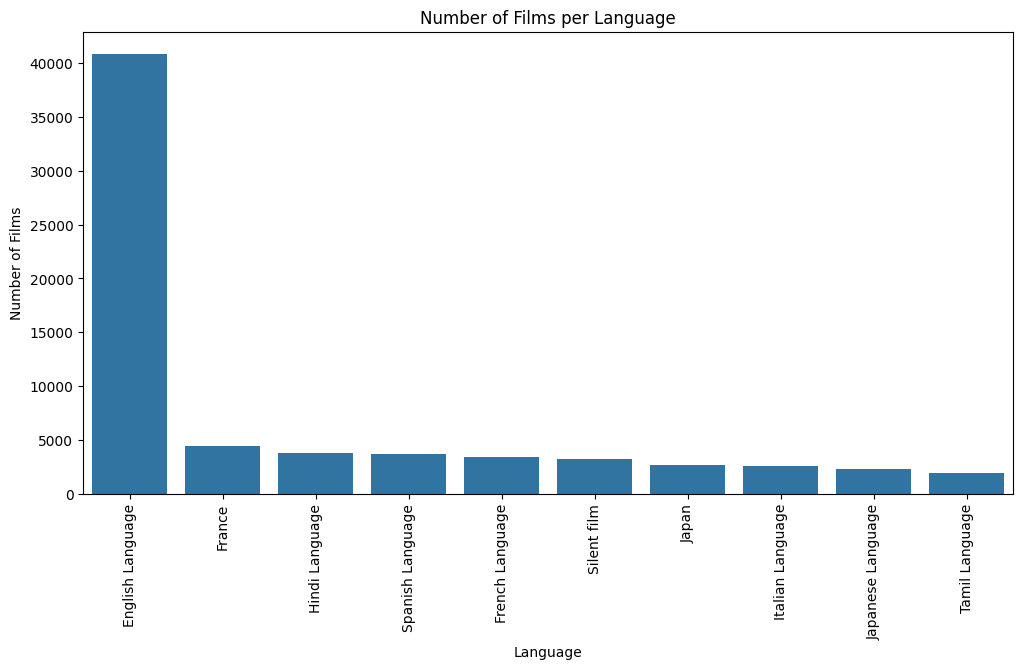

In [15]:
# 1. Number of films per language
language_counts = movie_metadata_df[list(unique_languages)].sum()

sorted_language_counts  = language_counts.sort_values(ascending=False)
top_languages = sorted_language_counts.head(10)


# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_languages.index, y=top_languages.values)
plt.title('Number of Films per Language')
plt.xticks(rotation=90)
plt.xlabel('Language')
plt.ylabel('Number of Films')
plt.show()



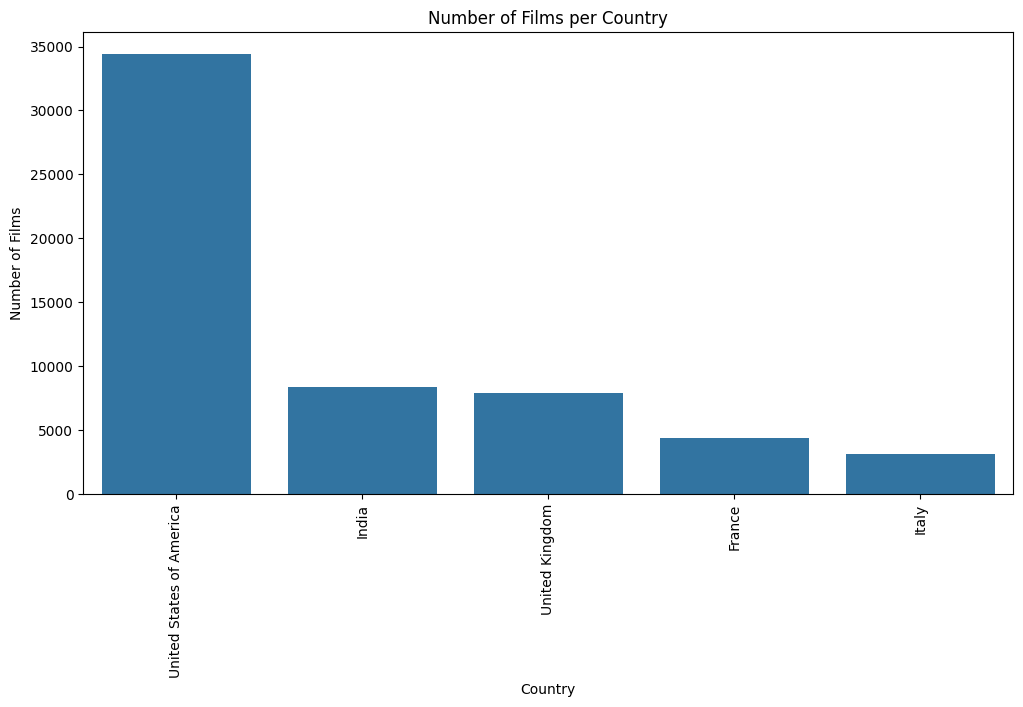

In [31]:

# 2. Number of films per country
countries_counts = movie_metadata_df[list(unique_countries)].sum()

sorted_countries_counts  = countries_counts.sort_values(ascending=False)
top_countries = sorted_countries_counts.head(5)


# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Number of Films per Country')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Films')
plt.show()


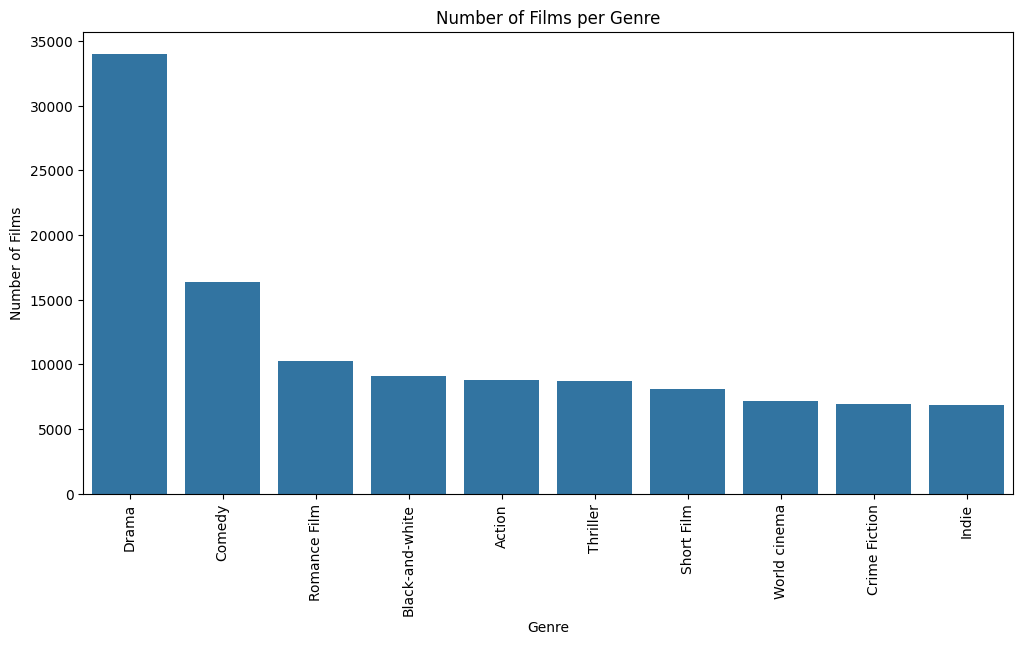

In [17]:
# 3. Number of films per genre
genres_counts = movie_metadata_df[list(unique_genres)].sum()

sorted_genres_counts  = genres_counts.sort_values(ascending=False)
top_genres = sorted_genres_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title('Number of Films per Genre')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Number of Films')
plt.show()


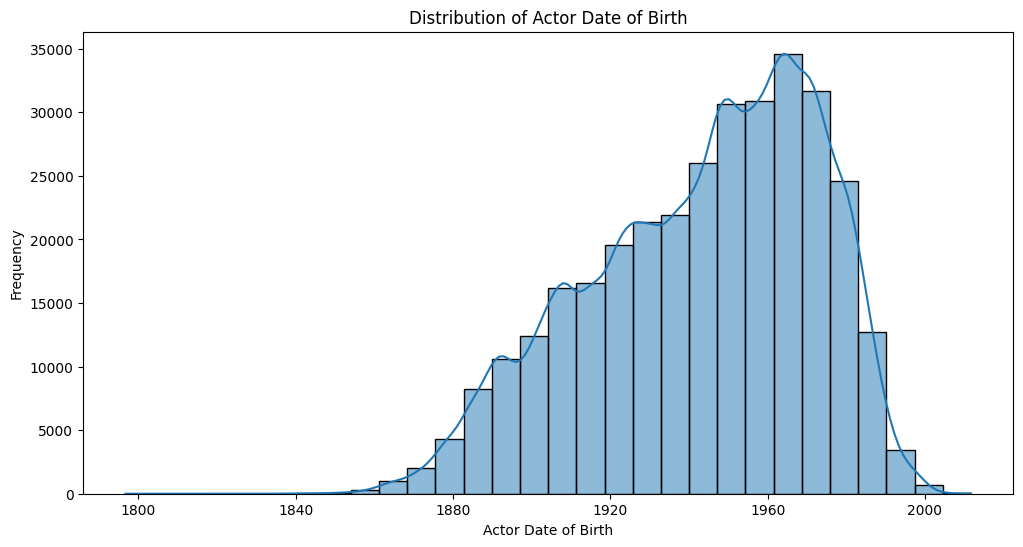

In [18]:
# Convert date columns to datetime format for consistency
movie_metadata_df['release_date'] = pd.to_datetime(movie_metadata_df['release_date'], errors='coerce')
character_metadata_df['release_date'] = pd.to_datetime(character_metadata_df['release_date'], errors='coerce')

character_metadata_df['actor_dob'] = pd.to_datetime(character_metadata_df['actor_dob'], errors='coerce')

# 4. Distribution of actor's date of birth (dob)
plt.figure(figsize=(12, 6))
sns.histplot(character_metadata_df['actor_dob'], bins=30, kde=True)
plt.title('Distribution of Actor Date of Birth')
plt.xlabel('Actor Date of Birth')
plt.ylabel('Frequency')
plt.show()


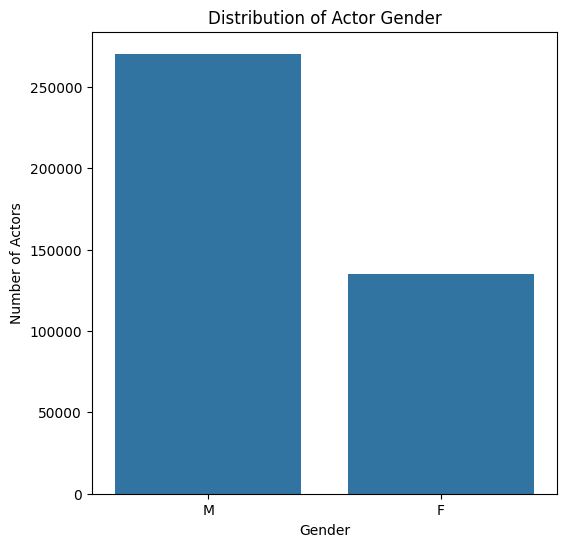

In [19]:

# 5. Distribution of actor gender
actor_gender_counts = character_metadata_df['actor_gender'].value_counts()
plt.figure(figsize=(6, 6))
sns.barplot(x=actor_gender_counts.index, y=actor_gender_counts.values)
plt.title('Distribution of Actor Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Actors')
plt.show()


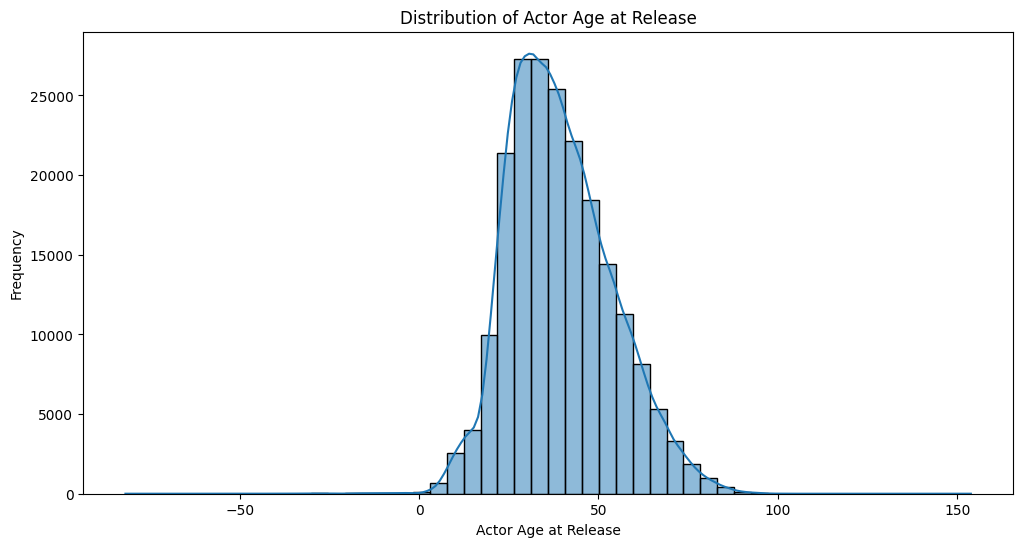

In [20]:


# 6. Distribution of actor age at release
character_metadata_df['actor_age_at_release'] = (character_metadata_df['release_date'] - character_metadata_df['actor_dob']).dt.days / 365.25
plt.figure(figsize=(12, 6))
sns.histplot(character_metadata_df['actor_age_at_release'], bins=50, kde=True)
plt.title('Distribution of Actor Age at Release')
plt.xlabel('Actor Age at Release')
plt.ylabel('Frequency')
plt.show()


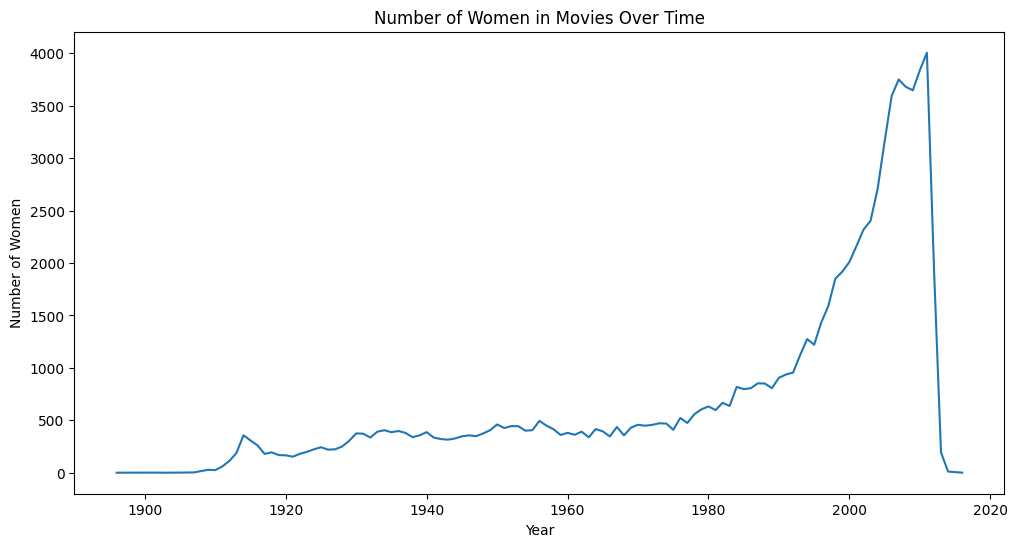

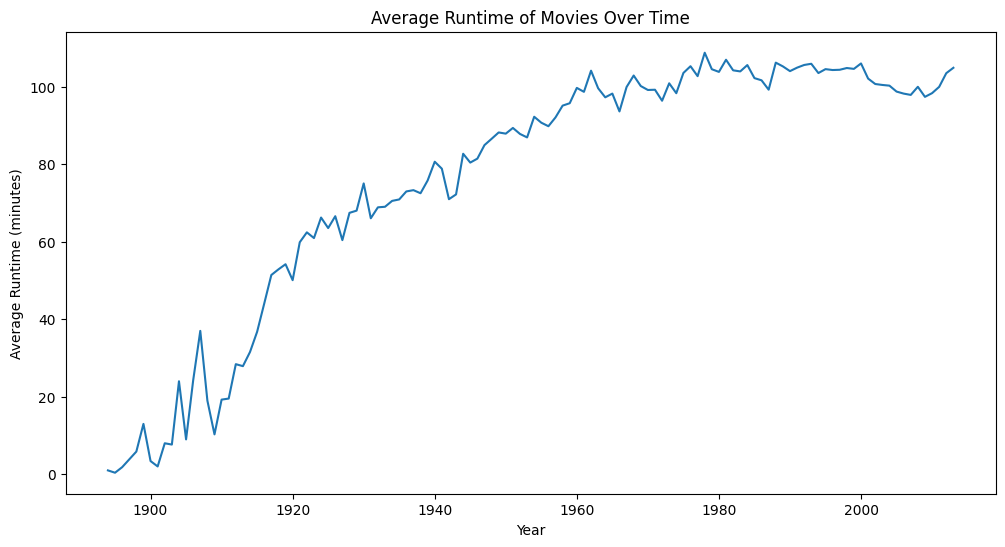

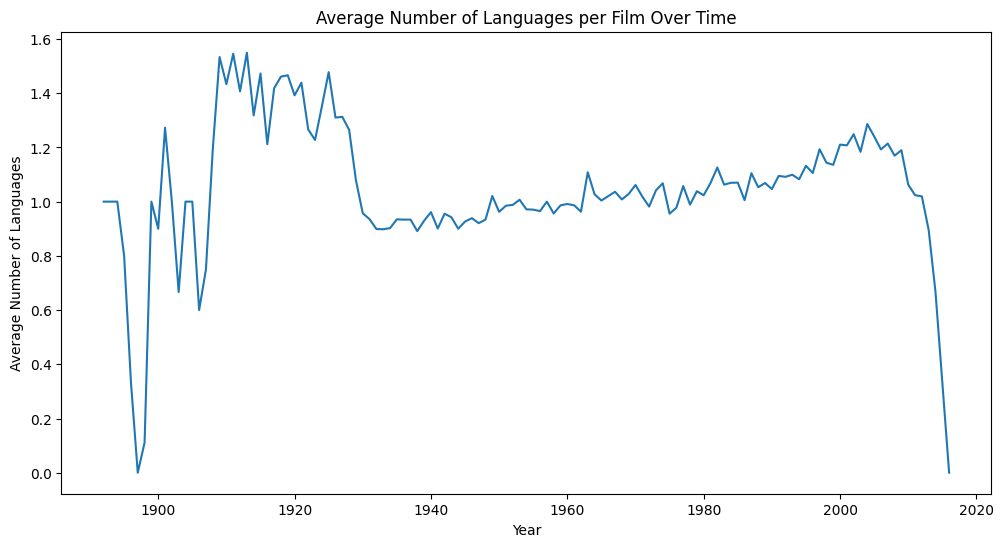

In [21]:


# 7. Time series analysis


# 7.1 Number of women in movies over time
women_counts_over_time = character_metadata_df[character_metadata_df['actor_gender'] == 'F'].groupby(character_metadata_df['release_date'].dt.year).size()
plt.figure(figsize=(12, 6))
sns.lineplot(x=women_counts_over_time.index, y=women_counts_over_time.values)
plt.title('Number of Women in Movies Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Women')
plt.show()

# 7.2 Runtime of movies over time
runtime_over_time = movie_metadata_df.groupby(movie_metadata_df['release_date'].dt.year)['runtime'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=runtime_over_time.index, y=runtime_over_time.values)
plt.title('Average Runtime of Movies Over Time')
plt.xlabel('Year')
plt.ylabel('Average Runtime (minutes)')
plt.show()

# 7.3 Number of languages per film over time
# Create a new column for the number of languages

movie_metadata_df['num_languages'] = movie_metadata_df['languages'].str.len()
languages_per_film_over_time = movie_metadata_df.groupby(movie_metadata_df['release_date'].dt.year)['num_languages'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=languages_per_film_over_time.index, y=languages_per_film_over_time.values)
plt.title('Average Number of Languages per Film Over Time')
plt.xlabel('Year')
plt.ylabel('Average Number of Languages')
plt.show()



In [32]:
top_countries_index = top_countries.index


# 4. Tracer le nombre de films par pays au fil du temps
filtered_df = movie_metadata_df[movie_metadata_df['countries'].apply(lambda x: any(country in x for country in top_countries_index))]

# Convertir les listes de pays en lignes distinctes pour chaque pays dans chaque film
exploded_df = filtered_df.explode('countries')

# Filtrer pour conserver uniquement les lignes avec les pays du top
exploded_df = exploded_df[exploded_df['countries'].isin(top_countries_index)]

# Calculer le nombre de films par pays au fil du temps
films_per_country_over_time = (exploded_df.groupby([exploded_df['release_date'].dt.year, 'countries'])
                               .size()
                               .unstack(fill_value=0))



<Figure size 1600x1000 with 0 Axes>

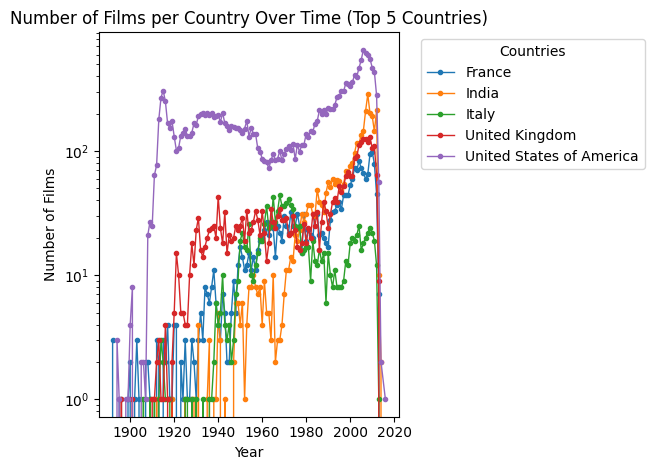

In [33]:
# Tracer le nombre de films par pays au fil du temps
plt.figure(figsize=(16, 10))
films_per_country_over_time.plot(kind='line', marker='.', linewidth=1)
plt.title('Number of Films per Country Over Time (Top 5 Countries)')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.yscale('log')
plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()